# 6.6 Sourcing & Analyzing Time-Series Data

# Importing your Libraries and Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Configure API key 
quandl.ApiConfig.api_key = 'gLdvbyCGFqLTfDX-C_BT'

In [3]:
# Importing the Covid variable.
data = quandl.get('FED/SUBLPDCIRERS_LG_N_Q')

In [4]:
data.head()

,Value
Date,
2017-06-30,7.0
2017-09-30,9.0
2017-12-31,5.0
2018-03-31,6.0
2018-06-30,5.0


In [5]:
data.shape

(22, 1)

In [6]:
data.columns

Index(['Value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

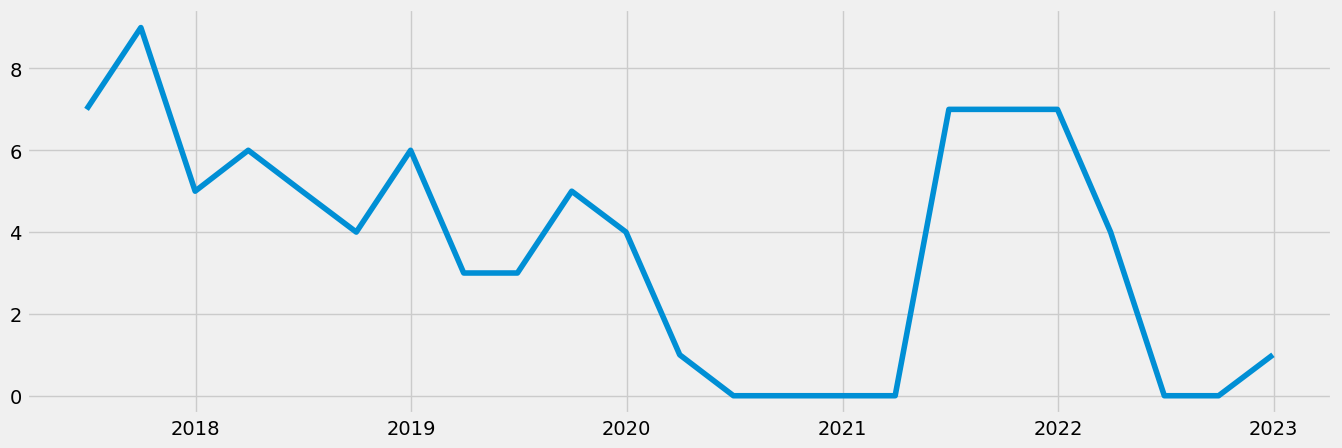

In [8]:
# Plot the data using matplotlib.
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data)

# Subsetting, Wrangling, and Cleaning Time-Series Data

In [9]:
# Reset index so that you can use the "Date" column as a filter
data_2 = data.reset_index()

In [10]:
data_2.head()

,Date,Value
0,2017-06-30,7.0
1,2017-09-30,9.0
2,2017-12-31,5.0
3,2018-03-31,6.0
4,2018-06-30,5.0


In [11]:
data_sub = data_2.loc[(data_2['Date'] >= '2017-06-30') & (data_2['Date'] < '2022-12-31')]

In [12]:
data_sub.shape

(21, 2)

In [13]:
data_sub.head()

,Date,Value
0,2017-06-30,7.0
1,2017-09-30,9.0
2,2017-12-31,5.0
3,2018-03-31,6.0
4,2018-06-30,5.0


In [14]:
# Set the "Date" column as the index
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) 
data_sub = data_sub.set_index('datetime') 
data_sub.drop(['Date'], axis=1, inplace=True) 
data_sub.head()

,Value
datetime,
2017-06-30,7.0
2017-09-30,9.0
2017-12-31,5.0
2018-03-31,6.0
2018-06-30,5.0


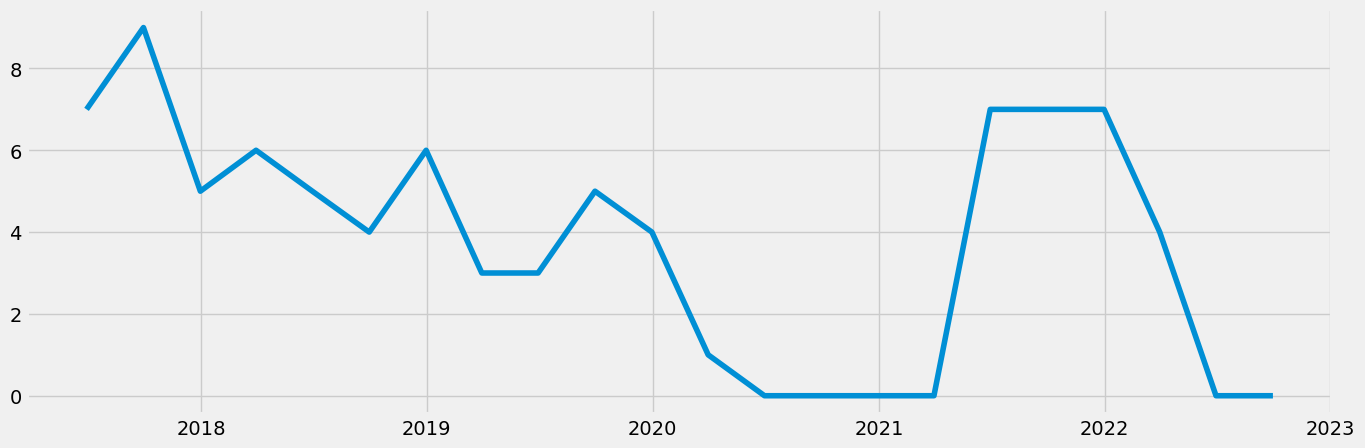

In [15]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

# Time-Series Analysis: Decomposition

In [16]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period= 10)

In [17]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

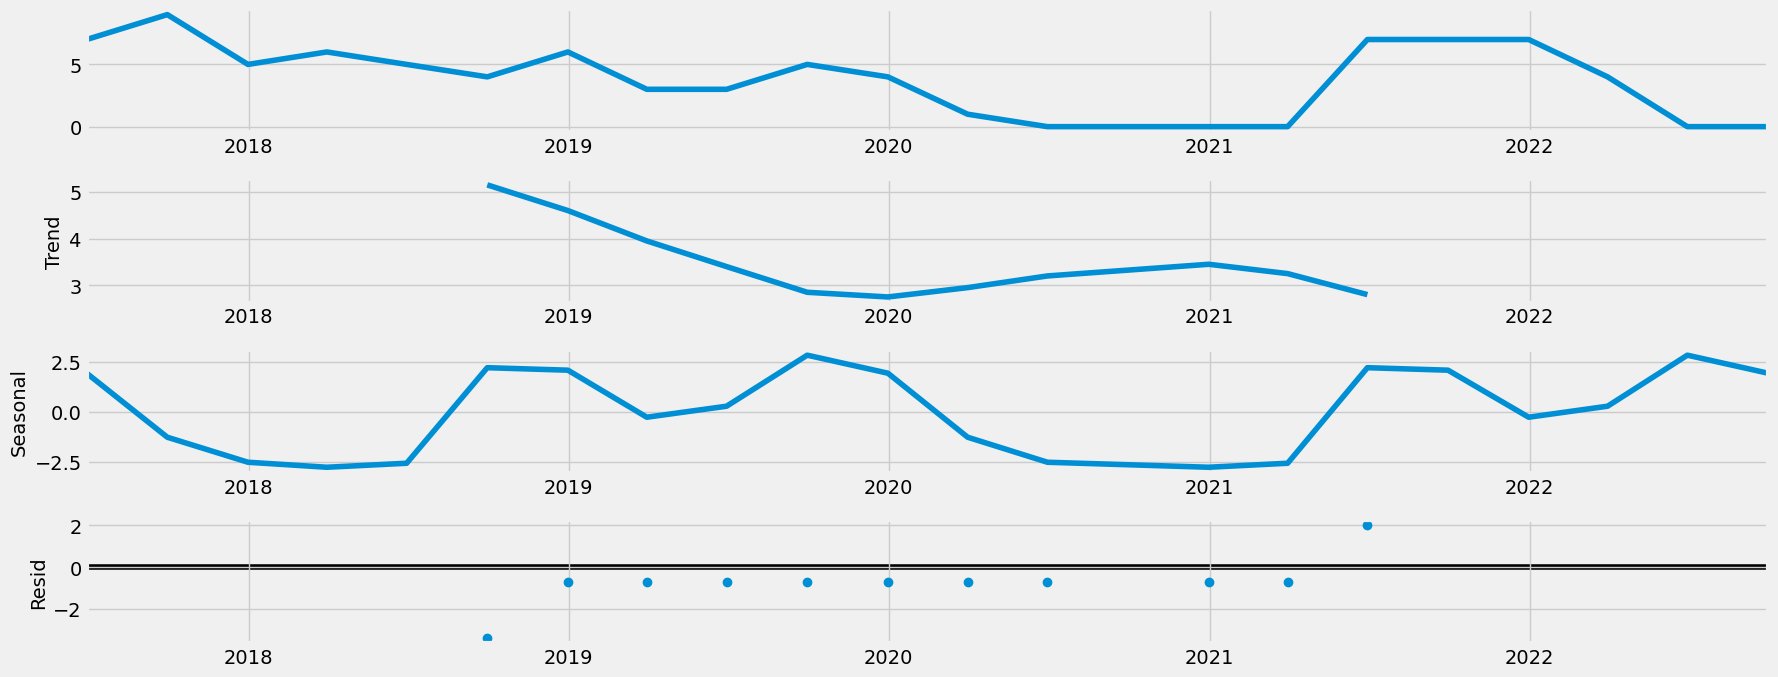

In [18]:
# Plot the separate components
decomposition.plot()
plt.show()

# Testing for Stationarity

In [19]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.699741
p-value                         0.074083
Number of Lags Used             1.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


Test Statistics= -2.70 > Critical value=-3.03 significance level =0.05 The null hypothesis is not rejected The data is non-stationary This means that there is a unit root in the data

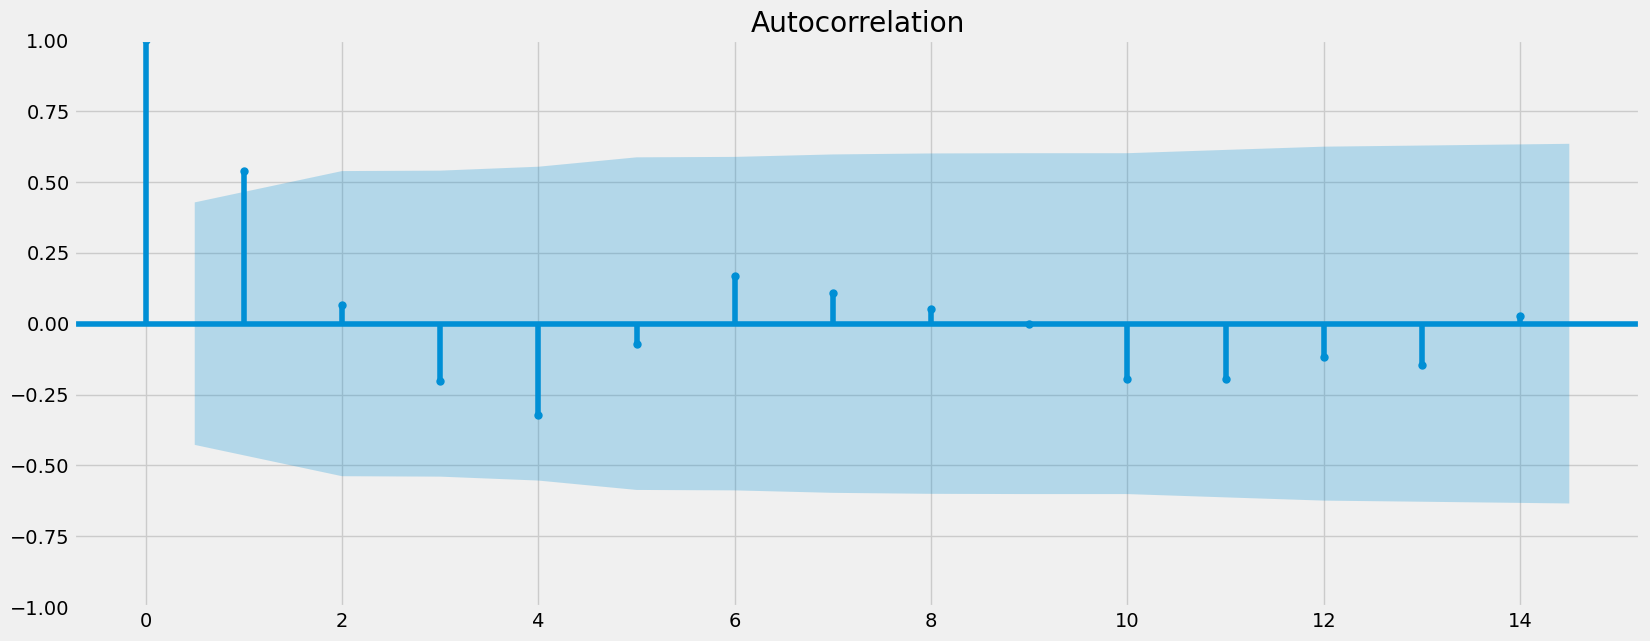

In [20]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_sub)
plt.show()

# Stationarizing the Covid Data

In [21]:
data_diff = data_sub - data_sub.shift(1)

In [22]:
data_diff.dropna(inplace = True)

In [23]:
data_diff.head()

,Value
datetime,
2017-09-30,2.0
2017-12-31,-4.0
2018-03-31,1.0
2018-06-30,-1.0
2018-09-30,-1.0


In [24]:
data_diff.columns

Index(['Value'], dtype='object')

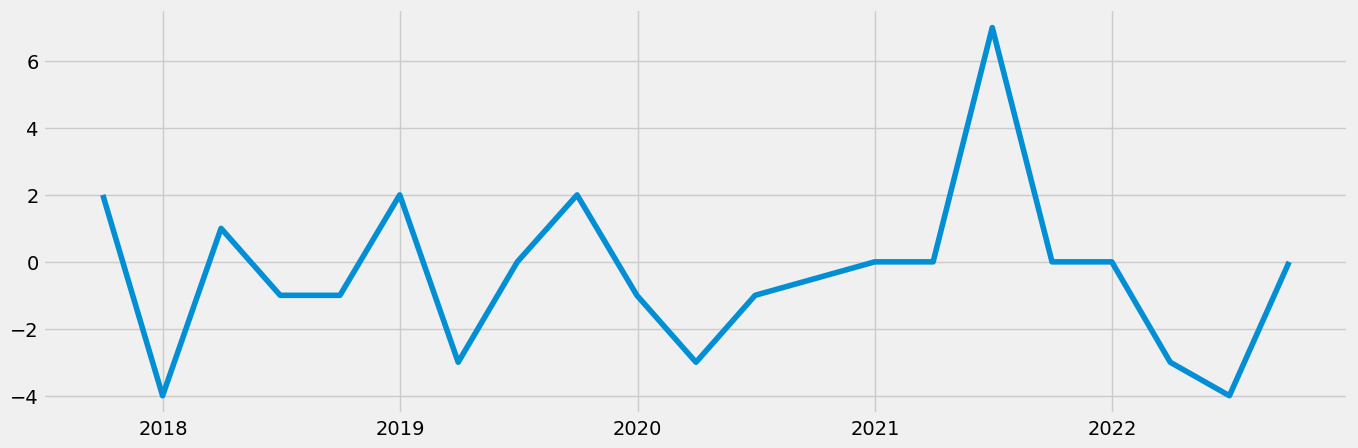

In [25]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [26]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  0.509419
p-value                         0.985157
Number of Lags Used             8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


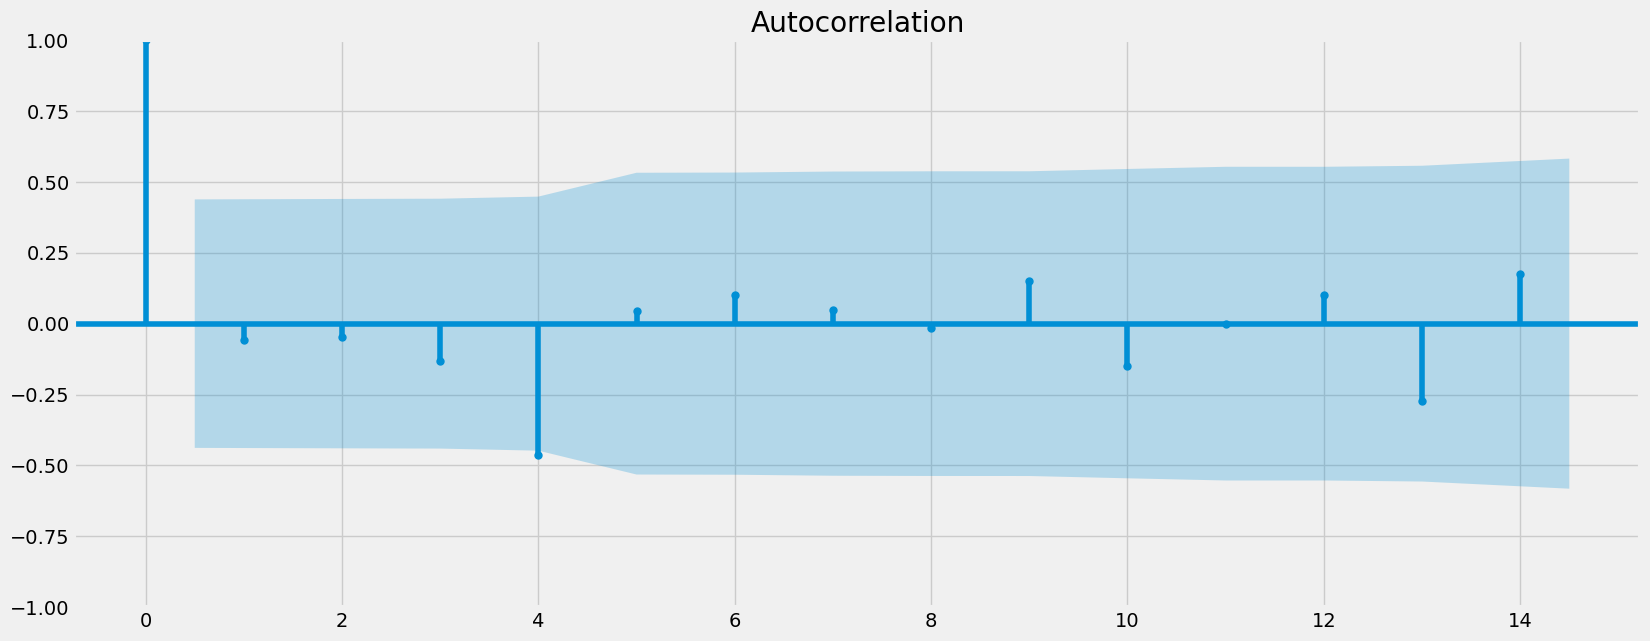

In [27]:
plot_acf(data_diff)
plt.show()

In [28]:
data_diff_2 = data_diff - data_diff.shift(1)

In [36]:
data_diff_2.head()

,Value
datetime,
2017-12-31,-6.0
2018-03-31,5.0
2018-06-30,-2.0
2018-09-30,0.0
2018-12-31,3.0


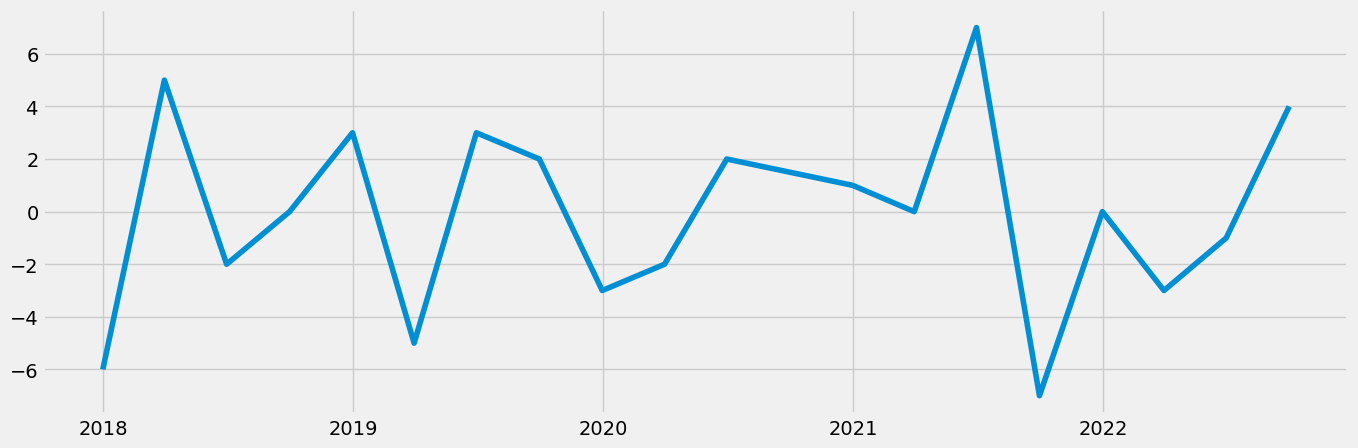

In [31]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [32]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.969386
p-value                         0.300156
Number of Lags Used             7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


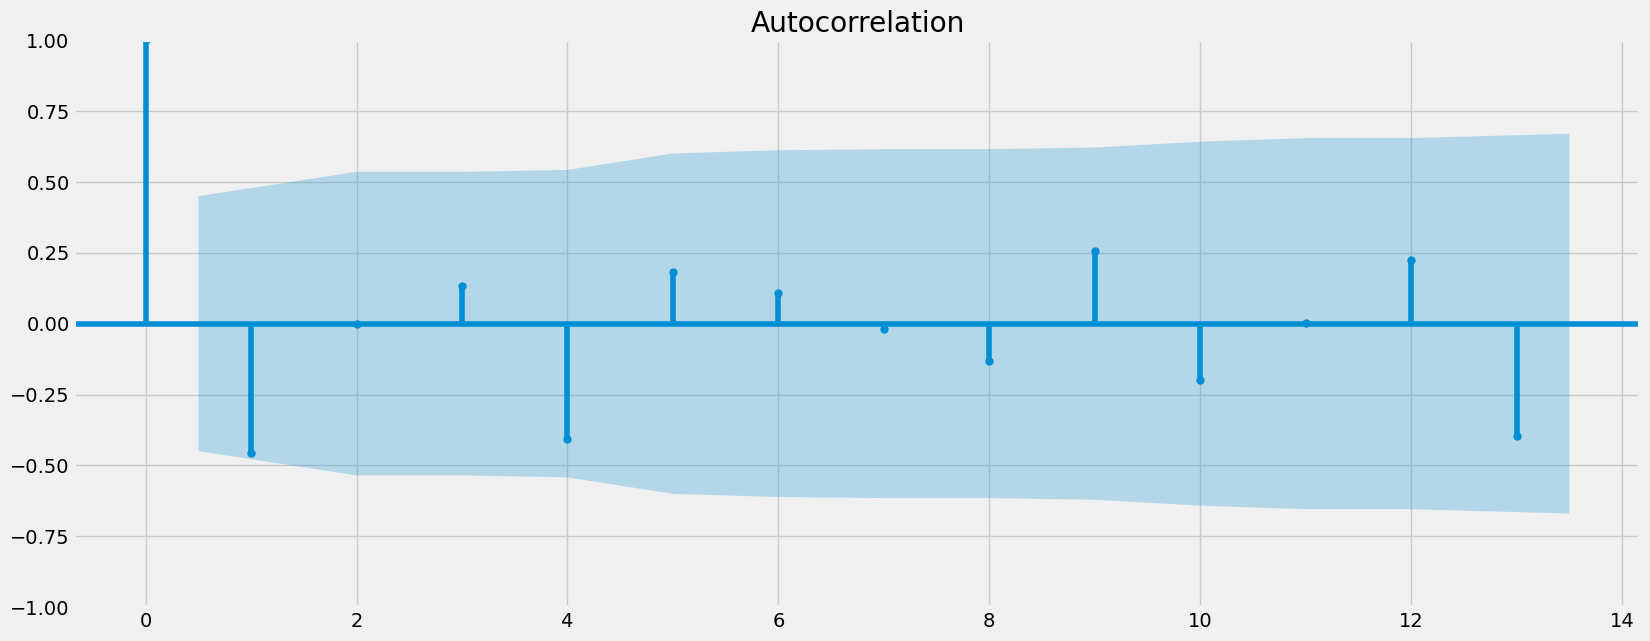

In [43]:
plot_acf(data_diff_2)
plt.show()

In [37]:
data_diff_3 = data_diff_2 - data_diff_2.shift(1)

In [38]:
data_diff_3.head()

,Value
datetime,
2017-12-31,NaN
2018-03-31,11.0
2018-06-30,-7.0
2018-09-30,2.0
2018-12-31,3.0


In [39]:
data_diff_3.dropna(inplace = True)

In [40]:
data_diff_3.head()

,Value
datetime,
2018-03-31,11.0
2018-06-30,-7.0
2018-09-30,2.0
2018-12-31,3.0
2019-03-31,-8.0


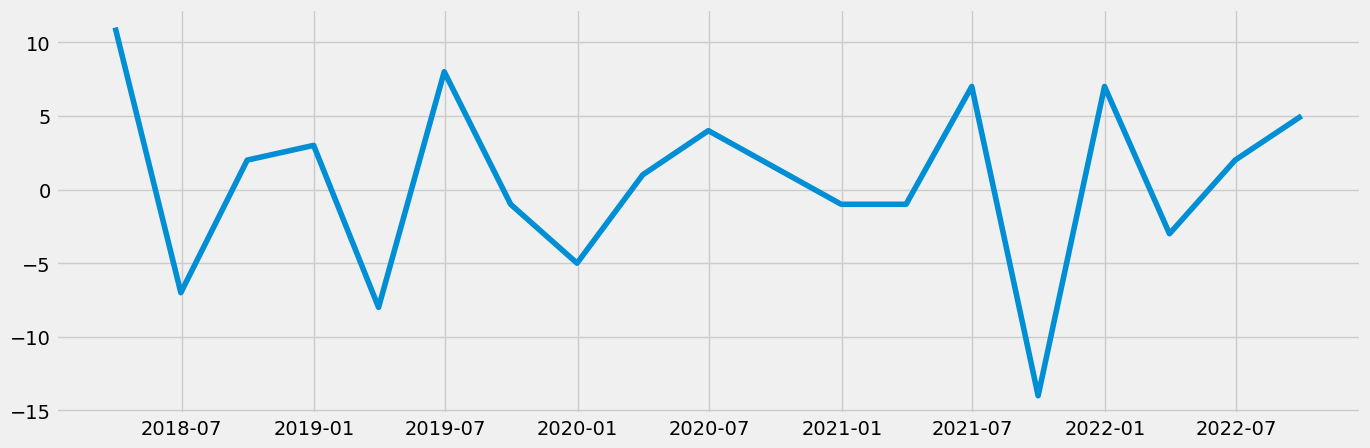

In [41]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_3)

In [42]:
dickey_fuller(data_diff_3)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.449041
p-value                         0.128370
Number of Lags Used             7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


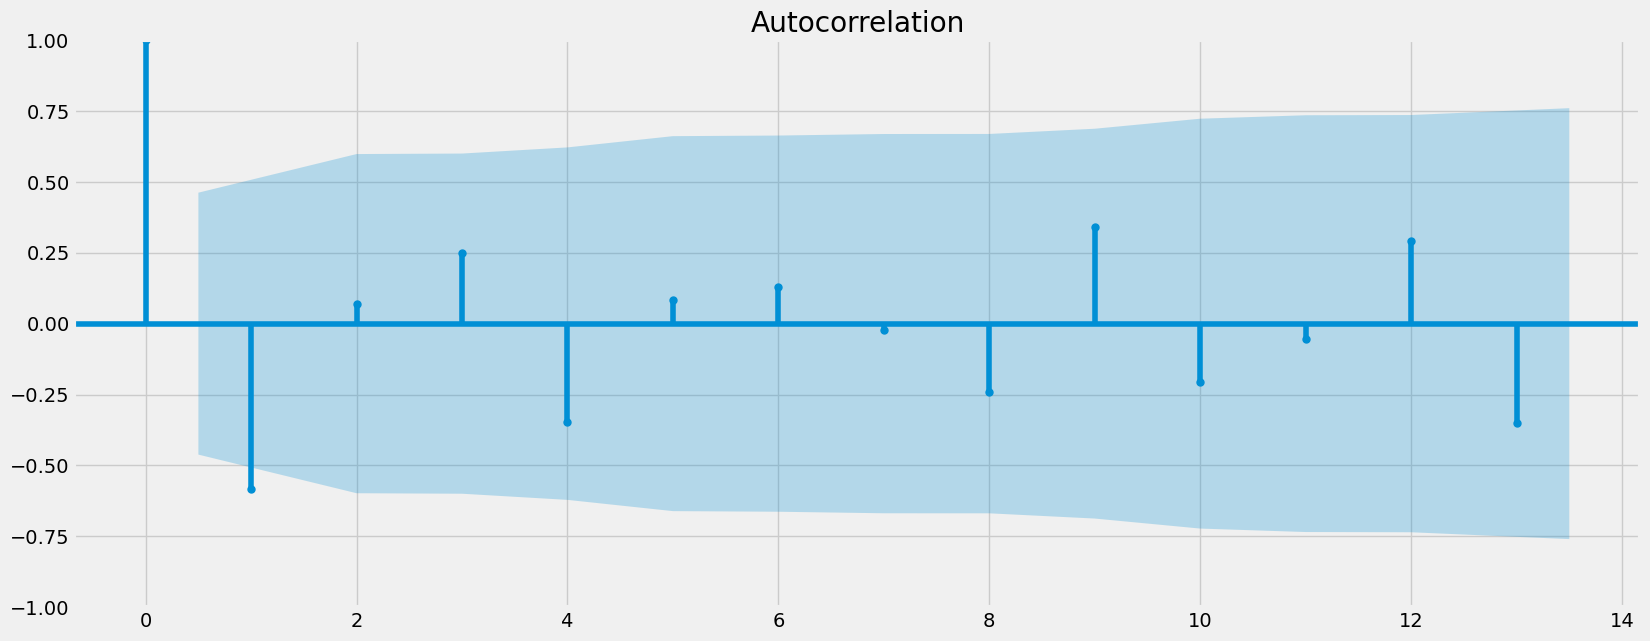

In [44]:
plot_acf(data_diff_3)
plt.show()

In [45]:
data_diff_4 = data_diff_3 - data_diff_3.shift(1)

In [46]:
data_diff_4.head()

,Value
datetime,
2018-03-31,NaN
2018-06-30,-18.0
2018-09-30,9.0
2018-12-31,1.0
2019-03-31,-11.0


In [47]:
data_diff_4.dropna(inplace = True)

In [48]:
data_diff_4.head()

,Value
datetime,
2018-06-30,-18.0
2018-09-30,9.0
2018-12-31,1.0
2019-03-31,-11.0
2019-06-30,16.0


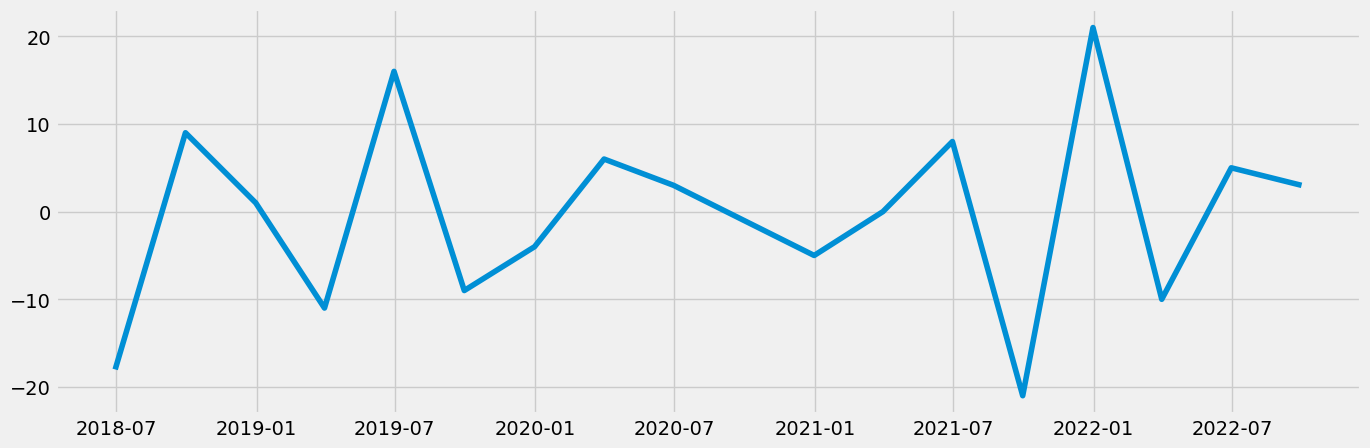

In [49]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_4)

In [50]:
dickey_fuller(data_diff_4)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.931673
p-value                         0.041787
Number of Lags Used             5.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


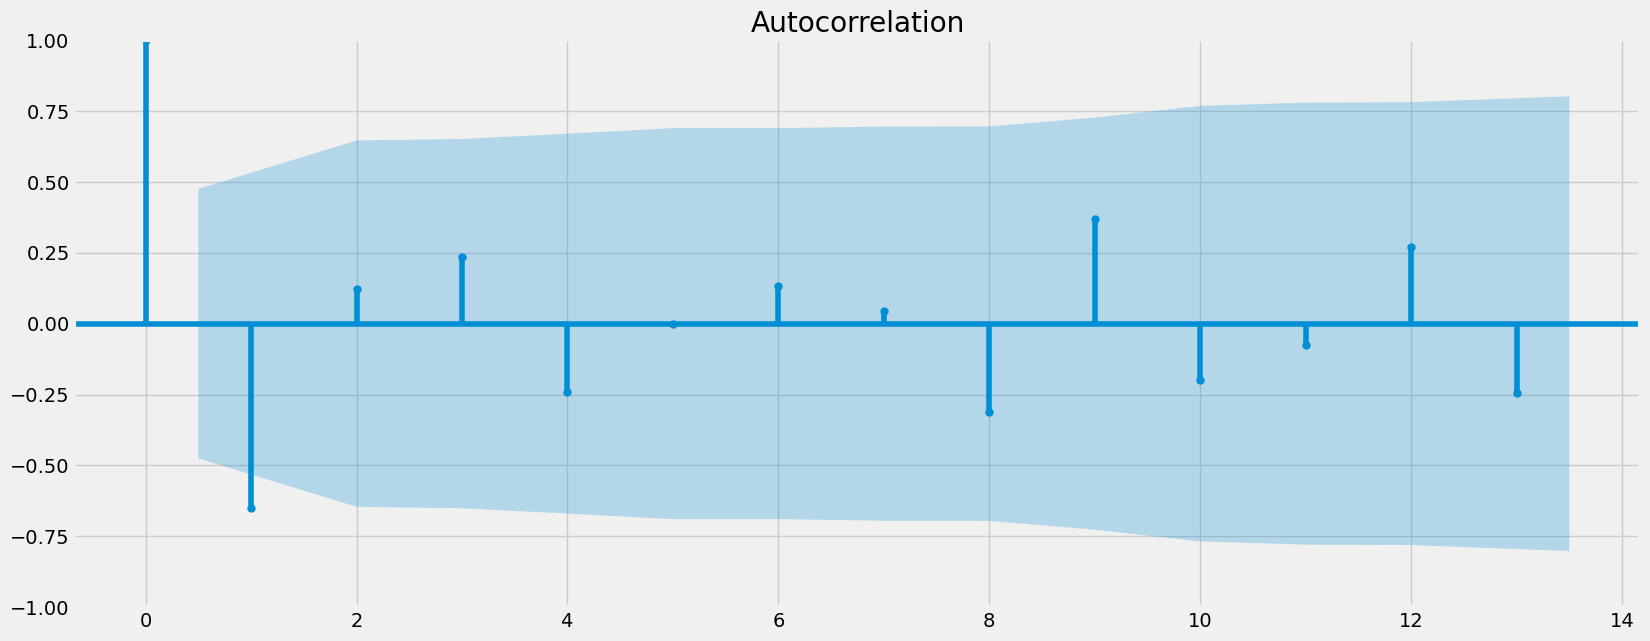

In [51]:
plot_acf(data_diff_4)
plt.show()

In [52]:
data_diff_5 = data_diff_4 - data_diff_4.shift(1)

In [53]:
data_diff_5.head()

,Value
datetime,
2018-06-30,NaN
2018-09-30,27.0
2018-12-31,-8.0
2019-03-31,-12.0
2019-06-30,27.0


In [54]:
data_diff_5.dropna(inplace = True)

In [55]:
data_diff_5.head()

,Value
datetime,
2018-09-30,27.0
2018-12-31,-8.0
2019-03-31,-12.0
2019-06-30,27.0
2019-09-30,-25.0


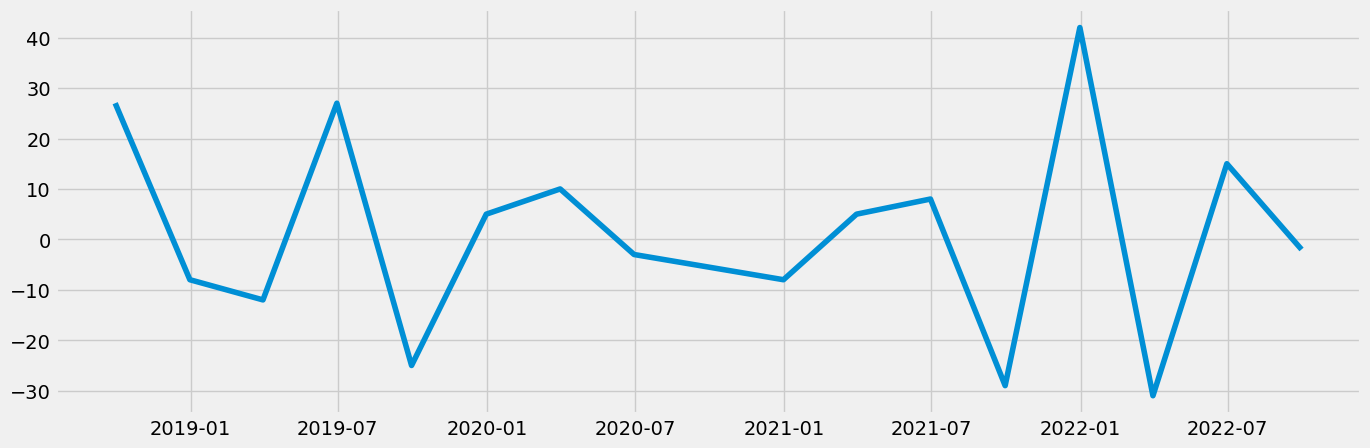

In [56]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_5)

In [57]:
dickey_fuller(data_diff_5)

Dickey-Fuller Stationarity test:
Test Statistic                -0.862370
p-value                        0.800112
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


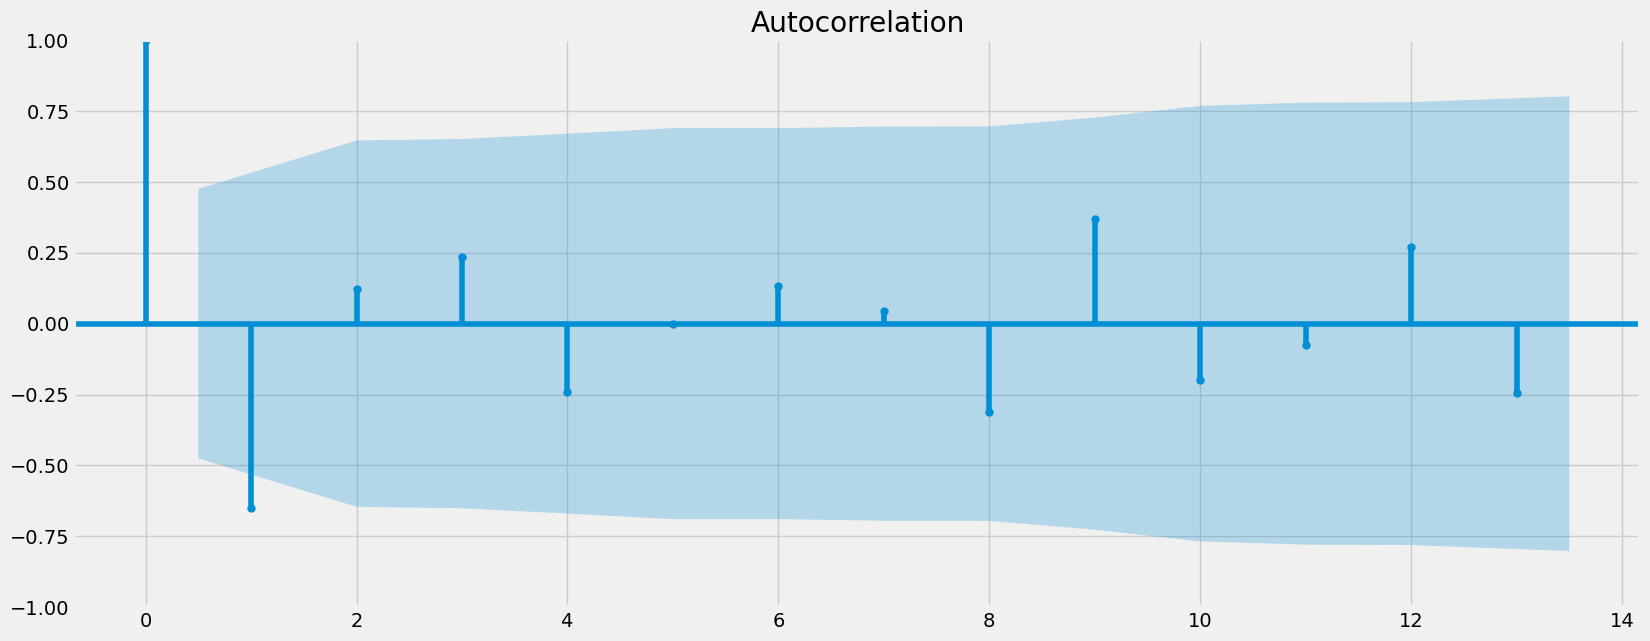

In [58]:
plot_acf(data_diff_4)
plt.show()

In [59]:
data_diff_6 = data_diff_5 - data_diff_5.shift(1)

In [61]:
data_diff_6.head()

,Value
datetime,
2018-09-30,NaN
2018-12-31,-35.0
2019-03-31,-4.0
2019-06-30,39.0
2019-09-30,-52.0


In [62]:
data_diff_6.dropna(inplace = True)

In [63]:
data_diff_6.head()

,Value
datetime,
2018-12-31,-35.0
2019-03-31,-4.0
2019-06-30,39.0
2019-09-30,-52.0
2019-12-31,30.0


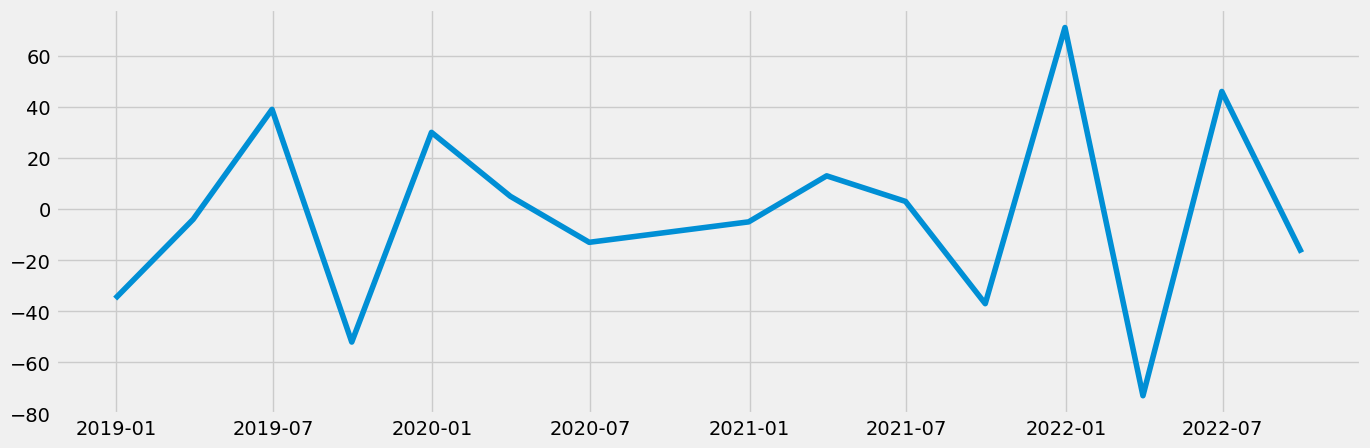

In [64]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_6)

In [65]:
dickey_fuller(data_diff_6)

Dickey-Fuller Stationarity test:
Test Statistic                -4.342594
p-value                        0.000375
Number of Lags Used            5.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [ ]:
Test Statistis= -4.34 < Critical value=-3.28
The null hypothesis is rejected. the series is stationary.

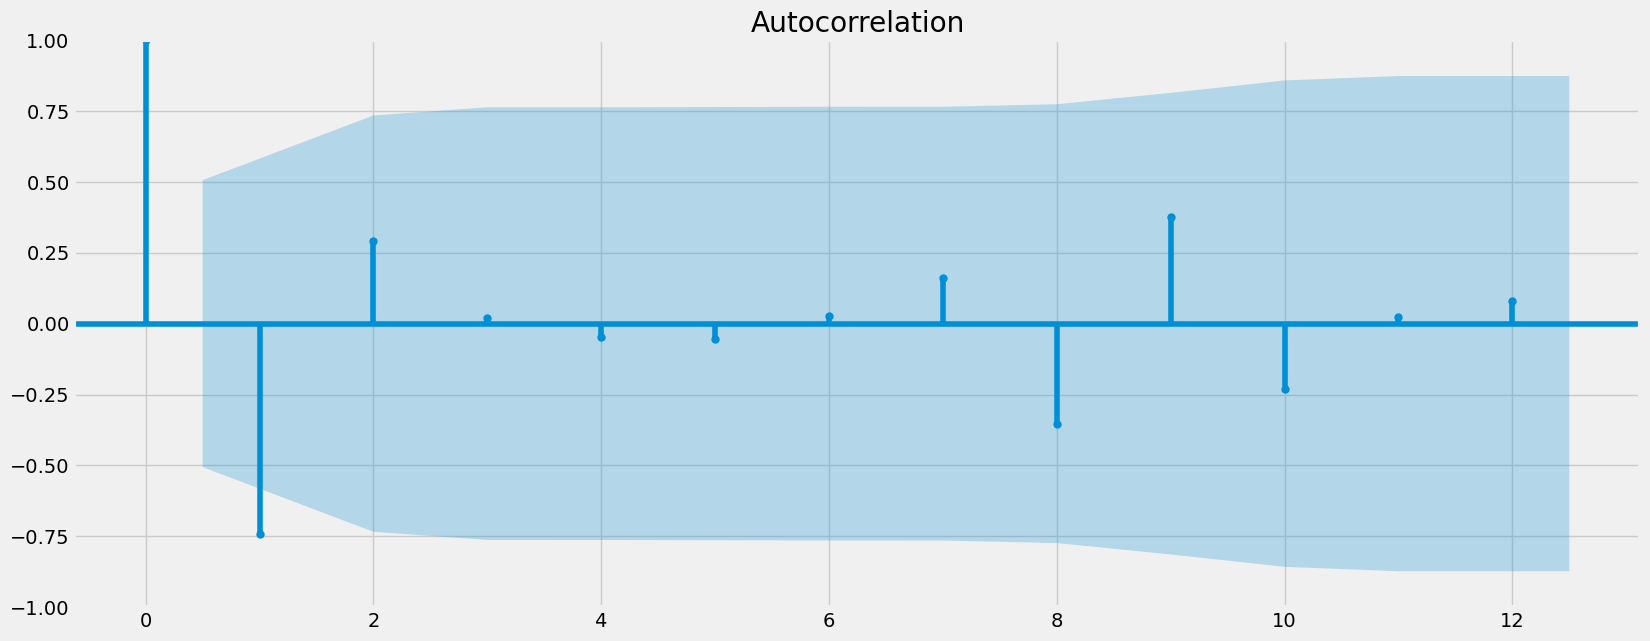

In [66]:
plot_acf(data_diff_6)
plt.show()

Although the autocorrelation plot has improved (there are fewer autocorrelated terms), it is still not perfect. This means that even though the Dickey-Fuller test says that the data is stationary, that stationarity is weak. I could do another round of differentiation to further park it and reduce the autocorrelated terms but I stop here. This is because of the unspoken rule of thumb that you need at least ten significant lags (or ten vertical lines above the confidence interval) for a second round of differentiation to be necessary.